# Notebook for generating enrichments and adding this to a knowledge graph 

## Importing libraries

In [1]:
from rdflib import Graph, RDF, Namespace, Literal, URIRef
from rdflib.namespace import XSD
from SPARQLWrapper import SPARQLWrapper2
import requests
import json
import numpy as np
import pandas as pd
import ipywidgets as widgets
import folium
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
%store -r bio_parts
%store -r pred_test_set

## Pre task 

In [3]:
def iob_to_standoff(entities):
    standoff_ne = [] 
    
    for i in range(len(entities)):
        current_ne = []
        entity = entities[i]
       
        token = entity[0]
        tag= entity[2]
        if tag.startswith("B"):
            standoff = tag.split("-",1)[1]
            current_ne.append(token)
            current_ne.append(standoff)
            standoff_ne.append(current_ne)
            
        elif tag.startswith("I"):
            if entities[i-1][2].startswith("O") or  i ==0:
                standoff_ne.append([token,tag])
            else:
                standoff_ne[-1][0] = standoff_ne[-1][0]+" " + token
        elif tag.startswith("O"):
            standoff_ne.append([token,tag])
        
    return standoff_ne

In [4]:
def get_linked_entity(sentence,bio_nr):

    dbpedia_uris = {}
    for entity in sentence:
        entity_text = entity[0]
        if entity[1] != "O":
            response = requests.get("http://api.dbpedia-spotlight.org/nl/annotate",
                                    params={"text": entity_text, "confidence": 0.5},
                                    headers={"Accept": "application/json"})
            if response.status_code != 200:
                continue
            response_json = json.loads(response.text)
            resources = response_json.get("Resources")
            if resources:
               
                dbpedia_uri = max(resources, key=lambda r: float(r["@similarityScore"]))["@URI"]
                
                print("Linked entitiy: " + dbpedia_uri, " Entity: " + entity_text)
                dbpedia_uris['entity'] = entity_text
               
                dbpedia_uris['ner_class'] = entity[1]
                dbpedia_uris['bio_nr'] = bio_nr
                
                if dbpedia_uris['ner_class'] == "LOC":
                    dbpedia_uri = dbpedia_uri.replace("nl.","")
                    
                dbpedia_uris['uri'] = dbpedia_uri 

    if dbpedia_uris:
        return dbpedia_uris 

In [5]:
linked_entities = [] 
standoff_text = []
i=0
for biography in pred_test_set:
    standoff_bio = []
    biography_entities = []
    for sentence in biography:
        standoff = iob_to_standoff(sentence)
        linked_entity = get_linked_entity(standoff,i)
        if linked_entity != None:
            biography_entities.append(linked_entity)
        standoff_bio.append(standoff)
    linked_entities.append(biography_entities)
    standoff_text.append(standoff_bio)
    i+=1

Linked entitiy: http://nl.dbpedia.org/resource/Italië  Entity: Italië
Linked entitiy: http://nl.dbpedia.org/resource/Persyn  Entity: Natalis Persyn
Linked entitiy: http://nl.dbpedia.org/resource/Kunstlievend_Genootschap_Pictura  Entity: Pictura
Linked entitiy: http://nl.dbpedia.org/resource/Christiaan_Kramm  Entity: Kramm
Linked entitiy: http://nl.dbpedia.org/resource/Zweden  Entity: Zweden
Linked entitiy: http://nl.dbpedia.org/resource/Philippus_Rovenius  Entity: Philip Rovenius
Linked entitiy: http://nl.dbpedia.org/resource/België  Entity: België
Linked entitiy: http://nl.dbpedia.org/resource/Peter_Paul_Rubens  Entity: Rubens
Linked entitiy: http://nl.dbpedia.org/resource/Reinier_Pauw_(1564-1636)  Entity: Reinier Pauw
Linked entitiy: http://nl.dbpedia.org/resource/Evangelie_volgens_Johannes  Entity: Johannes Visscher
Linked entitiy: http://nl.dbpedia.org/resource/Adrianus_Simonis  Entity: Cornelius Simonis Kluverius
Linked entitiy: http://nl.dbpedia.org/resource/Joost_van_den_Vondel 

Linked entitiy: http://nl.dbpedia.org/resource/Graafschap_Mark  Entity: Graaf van der Mark
Linked entitiy: http://nl.dbpedia.org/resource/Station_Medemblik  Entity: Medemblik
Linked entitiy: http://nl.dbpedia.org/resource/Station_Medemblik  Entity: Medemblik
Linked entitiy: http://nl.dbpedia.org/resource/Hoorn_(Noord-Holland)  Entity: Hoorn
Linked entitiy: http://nl.dbpedia.org/resource/Station_Medemblik  Entity: Medemblik
Linked entitiy: http://nl.dbpedia.org/resource/Haarlem  Entity: Haarlem
Linked entitiy: http://nl.dbpedia.org/resource/Alkmaar  Entity: Alkmaar
Linked entitiy: http://nl.dbpedia.org/resource/Heilo_(motorfiets)  Entity: Heilo
Linked entitiy: http://nl.dbpedia.org/resource/Fadrique_Álvarez_de_Toledo  Entity: Don Frederik
Linked entitiy: http://nl.dbpedia.org/resource/Floris_van_Henegouwen  Entity: Burgemeester Floris van Teylingen
Linked entitiy: http://nl.dbpedia.org/resource/Alkmaar  Entity: Alkmaar
Linked entitiy: http://nl.dbpedia.org/resource/Vlaanderen  Entity: V

Linked entitiy: http://nl.dbpedia.org/resource/Janneke  Entity: Janneke
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterdam
Linked entitiy: http://nl.dbpedia.org/resource/Alkmaarsche_Courant  Entity: Alkmaarsche Courant
Linked entitiy: http://nl.dbpedia.org/resource/Carl_Verheijen  Entity: J.B. Verheijen
Linked entitiy: http://nl.dbpedia.org/resource/Napoleon_Bonaparte  Entity: Napoleon
Linked entitiy: http://nl.dbpedia.org/resource/Soevereiniteit  Entity: Souverein
Linked entitiy: http://nl.dbpedia.org/resource/Noord-Brabant  Entity: Zuidelijke Nederlanden Noord-Brabant
Linked entitiy: http://nl.dbpedia.org/resource/Tweede_Kamer_der_Staten-Generaal  Entity: Tweede Kamer
Linked entitiy: http://nl.dbpedia.org/resource/Willem_II_der_Nederlanden  Entity: Willem II
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterdam
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterdam
Linked entitiy: http://nl.dbpedia.org/resource/Amste

Linked entitiy: http://nl.dbpedia.org/resource/Wilhelmina_der_Nederlanden  Entity: Wilhelmina
Linked entitiy: http://nl.dbpedia.org/resource/Nederland  Entity: Nederland
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesië
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesië
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesië
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesië
Linked entitiy: http://nl.dbpedia.org/resource/Nederland  Entity: Nederland
Linked entitiy: http://nl.dbpedia.org/resource/Het_Parool  Entity: Het Parool
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesië
Linked entitiy: http://nl.dbpedia.org/resource/Indonesië  Entity: Indonesische
Linked entitiy: http://nl.dbpedia.org/resource/Yogyakarta  Entity: Djokjakarta
Linked entitiy: http://nl.dbpedia.org/resource/Yogyakarta  Entity: Djokja
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity

Linked entitiy: http://nl.dbpedia.org/resource/Frans_Goedhart  Entity: Frans Goedhart
Linked entitiy: http://nl.dbpedia.org/resource/NRC_Handelsblad  Entity: NRC Handelsblad
Linked entitiy: http://nl.dbpedia.org/resource/Frans_Goedhart  Entity: Frans Goedhart
Linked entitiy: http://nl.dbpedia.org/resource/Nederland  Entity: Nederland
Linked entitiy: http://nl.dbpedia.org/resource/Nijmegen  Entity: Nijmegen
Linked entitiy: http://nl.dbpedia.org/resource/Het_Parool  Entity: Het Parool 1940-1945
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterdam
Linked entitiy: http://nl.dbpedia.org/resource/Republiek_der_Zeven_Verenigde_Nederlanden  Entity: Republiek
Linked entitiy: http://nl.dbpedia.org/resource/Jakarta  Entity: Jakarta
Linked entitiy: http://nl.dbpedia.org/resource/Koude_Oorlog  Entity: Van Koude Oorlog
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterdam
Linked entitiy: http://nl.dbpedia.org/resource/Koude_Oorlog  Entity: Koude Oorlog ;


Linked entitiy: http://nl.dbpedia.org/resource/Lily_Bouwmeester  Entity: Lily Bouwmeester
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam_Film_Cie  Entity: Amsterdam Film Cie.
Linked entitiy: http://nl.dbpedia.org/resource/Em._Querido's_Uitgeverij  Entity: Querido
Linked entitiy: http://nl.dbpedia.org/resource/Menschenwee  Entity: Menschenwee
Linked entitiy: http://nl.dbpedia.org/resource/Louis_Davids  Entity: Louis Davids
Linked entitiy: http://nl.dbpedia.org/resource/Kitty_Kluppell  Entity: Kitty Kluppell
Linked entitiy: http://nl.dbpedia.org/resource/Noordzee  Entity: Noordzee
Linked entitiy: http://nl.dbpedia.org/resource/Annie_Wesling  Entity: Annie Wesling
Linked entitiy: http://nl.dbpedia.org/resource/Berlijn  Entity: Berlijn
Linked entitiy: http://nl.dbpedia.org/resource/Alexandra_van_Denemarken  Entity: Alexandra
Linked entitiy: http://nl.dbpedia.org/resource/Koning_David  Entity: David Sluizer
Linked entitiy: http://nl.dbpedia.org/resource/Amsterdam  Entity: Amsterda

## Knowledge graph

In [6]:
g = Graph()

EX = Namespace('http://example.com/kad2020/')
foaf = Namespace("http://xmlns.com/foaf/0.1/")
g.bind('ex',EX)
g.bind('foaf',foaf)

def serialize_graph():
    # g.serialize() returns a string
    print(g.serialize(format='turtle'))

def save_graph(filename):
    with open(filename, 'w') as f:
        g.serialize(f, format='nt')
        
def load_graph(filename):
    with open(filename, 'r') as f:
        g.parse(f, format='turtle')   

#### Functions that are needed to create the knowledge graph 

In [7]:
def get_dbpedia_for_name(name):
        link_exists = False 
    
        response = requests.get("http://api.dbpedia-spotlight.org/nl/annotate",
                                params={"text": [[name,'PER']], "confidence": 0.5},
                                headers={"Accept": "application/json"})
        
        response_json = json.loads(response.text)
        resources = response_json.get("Resources")
        if resources:
                # Choose the candidate with the highest score
                dbpedia_uri = max(resources, key=lambda r: float(r["@similarityScore"]))["@URI"]
                
                dbpedia_uri = dbpedia_uri.replace("nl.","")
                link_exists = True
               
        dbpedia_uris = None 
        if link_exists:
            dbpedia_uris= dbpedia_uri 
        return dbpedia_uris

In [8]:
def get_person(bio_part):

    sparql = SPARQLWrapper2("http://DESKTOP-409PJ8J:7200/repositories/intavia")
    sparql.setQuery("""
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX bgn: <http://data.biographynet.nl/rdf/>
        PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
        SELECT ?name
        WHERE {
            ?bio_des bgn:hasBioParts <%s>. 
            ?bio_des bgn:hasPersonDes ?person_des. 
            ?person_des crm:P1_is_identified_by ?name_des. 
            ?name_des rdfs:label ?name 

        } LIMIT 1 

        """%(bio_part))

    link = None
    for result in sparql.query().bindings:
        link = result['name'].value
    
    return link 

In [9]:
def person_link_in_ontology(person):  
    sparql = SPARQLWrapper2("http://DESKTOP-409PJ8J:7200/repositories/intavia")
    sparql.setQuery("""
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX bgn: <http://data.biographynet.nl/rdf/>
        PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
        SELECT ?linked_entity
        WHERE {
            ?linked_entity crm:P1_is_identified_by ?name. 
            ?linked_entity a crm:E21_Person.
            ?name rdfs:label '%s' . 
        } LIMIT 1 

        """ %(person))
    link = None
    for result in sparql.query().bindings:
        
        link = result['linked_entity'].value
        
    return link

#### Creation of knowledge graphs and enrichments 

In [10]:
ex = Namespace("http://example.com/kad2020/")
rdfs =Namespace("http://www.w3.org/2000/01/rdf-schema#")
rdf = Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#")
owl = Namespace('http://www.w3.org/2002/07/owl#')

for bio in bio_parts:
   

   
    person_name = get_person(bio[0])
   

    if person_name == "    Mr. \n     H. \n     Verkouteren \n   ":
        person_name = "    Mr. \\n     H. \\n     Verkouteren \\n   "
   
    dbpedia_link = get_dbpedia_for_name(person_name)
    
    ontology_id =  person_link_in_ontology(person_name)
    
    bio_nr = bio[1]
    
    g.add((URIRef(ontology_id),rdf.type,foaf.Person))
    g.add((URIRef(ontology_id), rdfs.label, Literal(person_name)))
    g.add((URIRef(ontology_id), ex.hasBiographyNr, Literal(bio_nr, datatype=XSD.integer)))

    biography = linked_entities[bio_nr]


    for entity in biography:

        if entity['ner_class']=='LOC':
            g.add((URIRef(entity['uri']),rdf.type,ex.Place))
            g.add((URIRef(entity['uri']), rdfs.label, Literal(entity['entity'])))
            g.add((URIRef(ontology_id),ex.hasPlace,URIRef(entity['uri'])))
        if entity['ner_class'] == 'PER' and dbpedia_link != entity['uri']:
            g.add((URIRef(entity['uri']),rdf.type,foaf.Person))
            g.add((URIRef(entity['uri']), rdfs.label, Literal(entity['entity'])))
            g.add((URIRef(ontology_id),ex.associatedPerson,URIRef(entity['uri'])))
        if entity['ner_class'] == 'ORG':
            g.add((URIRef(entity['uri']),rdf.type,ex.Organization))
            g.add((URIRef(entity['uri']), rdfs.label, Literal(entity['entity'])))
            g.add((URIRef(ontology_id), ex.associatedOrganization,URIRef(entity['uri'])))
        if entity['ner_class'] == 'MISC':
            g.add((URIRef(entity['uri']),rdf.type,ex.Misc))
            g.add((URIRef(entity['uri']), rdfs.label, Literal(entity['entity'])))
            g.add((URIRef(ontology_id),ex.associatedMisc,URIRef(entity['uri'])))
              
              
print(g.serialize(format='turtle'))

@prefix ex: <http://example.com/kad2020/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://data.biographynet.nl/rdf/PersonDes-10167156_01> a foaf:Person ;
    rdfs:label "Huydecoper, Theodoor Cornelis Reinier" ;
    ex:hasBiographyNr 46 ;
    ex:hasPlace <http://dbpedia.org/resource/Gemaal_De_Lynden>,
        <http://dbpedia.org/resource/Hoorn_(Noord-Holland)>,
        <http://dbpedia.org/resource/Huydecoper> .

<http://data.biographynet.nl/rdf/PersonDes-11762669_02> a foaf:Person ;
    rdfs:label "Zachten , E.P. " ;
    ex:hasBiographyNr 5 .

<http://data.biographynet.nl/rdf/PersonDes-14084929_02> a foaf:Person ;
    rdfs:label "Frenkel [sr.] , Theodorus Maurits " ;
    ex:associatedMisc <http://nl.dbpedia.org/resource/Duitsland>,
        <http://nl.dbpedia.org/resource/Filmfabriek_Hollandia>,
        <http://nl.dbpedia.org/resource/Theo_Frenkel_sr.>,
        <http://nl.db

### Needed code for visualizations 

In [14]:
places = set()

res_place = g.query("""
    PREFIX ex: <http://example.com/kad2020/>
    PREFIX rdf:<http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        SELECT ?place
            WHERE{
                {?place rdf:type ex:Place} 
            }
""")

for row in res_place:
    places.add("%s" %row)

In [15]:
g.bind("geo", "http://www.w3.org/2003/01/geo/wgs84_pos#")
geo = Namespace("http://www.w3.org/2003/01/geo/wgs84_pos#")

for place in places:
    sparql = SPARQLWrapper2("http://dbpedia.org/sparql")
    sparql.setQuery("""
        PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
        PREFIX dbo: <http://dbpedia.org/ontology/>
       
        SELECT ?longitude ?latitude 
            WHERE{
            <""" + place + """>  geo:long ?longitude .
            <""" + place + """> geo:lat ?latitude.
            }
    """)
    
    for result in sparql.query().bindings:
        g.add((URIRef(place), geo.long, Literal(result["longitude"].value)))
        g.add((URIRef(place), geo.lat, Literal(result["latitude"].value)))
        


In [16]:
query_persons_with_ontology_id = g.query("""
    PREFIX ex: <http://example.com/kad2020/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
        SELECT ?person ?name
            WHERE{
                ?person a foaf:Person.
                ?person rdfs:label ?name. 
                ?person ex:hasBiographyNr ?bionr
                
             
               
            }
""")

In [17]:
persons_with_ontology_id = []

for row in query_persons_with_ontology_id:
    
    persons_with_ontology_id.append(row['name'])
    


## Functions for showing visualizations 

## Visualization

In [18]:
def choose_person(style):
    global chosen_person 
    chosen_person = style

print("Please choose a historical person you would like to receive more information about via the dropdown menu: ")
stylesbox = widgets.interact(
    choose_person, 
    placeholder='Historical person',
    style = persons_with_ontology_id,
    description='Name:',
    ensure_option=True,
    disabled=False
)

Please choose a historical person you would like to receive more information about via the dropdown menu: 


interactive(children=(Dropdown(description='style', options=(rdflib.term.Literal('Theodorus  Matham '), rdflib…

In [19]:
def show_biography():
    global bio_nrs
    bio_nrs = []
    
    query_bio_nr = g.query("""
    PREFIX ex: <http://example.com/kad2020/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
        SELECT ?bio_nr
            WHERE{
                ?person a foaf:Person.
                ?person rdfs:label '%s'. 
                ?person ex:hasBiographyNr ?bio_nr
                
             
               
            }
    """%(chosen_person))
    
    for res in query_bio_nr:
        bio_nrs.append(res['bio_nr'])
        bio_nr = res['bio_nr']
        visualize_biography(standoff_text[int(bio_nr)])
    
def visualize_biography(text):
    import spacy
    from spacy.tokens import Doc, Span
    from spacy import displacy

    nlp = spacy.load("en_core_web_sm")

    vocab = nlp.vocab
    colors = {"PER": "#ADD8E6", "LOC": "#FFD580", "ORG":"#90EE90", "MISC":"#D8BFD8"}

    docs = []
    
    for sentence in text:
        
        words, entities = zip(*sentence)
        doc = Doc(vocab, words=words)
        spans = [Span(doc, i, i + 1, label=ent_type) for i, ent_type in enumerate(entities) if ent_type]
        doc.ents = spans
        docs.append(doc)

    options = {"ents": ["PER", "ORG", "LOC","MISC"], "colors": colors}
    displacy.render(docs, style="ent", options=options, jupyter=True)
   
show_biography()
    

In [20]:
def show_locations_of_person():
    person_locations = query_locations()
    df_person_locations = pd.DataFrame(person_locations, columns=['place', 'lat', 'long'])
    middle = [52.366665, 4.883333]
    m = folium.Map(location=middle, zoom_start=8)
    for _,row in df_person_locations.iterrows():
        marker_color = "#FF0000"
        marker_fill = "##FF0000"
        folium.CircleMarker(
            location=[row['lat'],row['long']],
            radius= 10,
            popup= row['place'],
            color=marker_color,
            fill=True,
            fill_color=marker_fill,
        ).add_to(m)

    return m 

def query_locations():
    person_locations = g.query("""
        PREFIX ex: <http://example.com/kad2020/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
        PREFIX foaf: <http://xmlns.com/foaf/0.1/>
        PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>
        
        SELECT distinct ?location ?lat ?long 
            WHERE{
                ?person a foaf:Person.
                ?person rdfs:label '%s'.
                ?person ex:hasPlace ?location.
                ?location geo:long ?long. 
                ?location geo:lat ?lat. 
               

                }
    """%(chosen_person))
    
 
    return person_locations

show_locations_of_person()

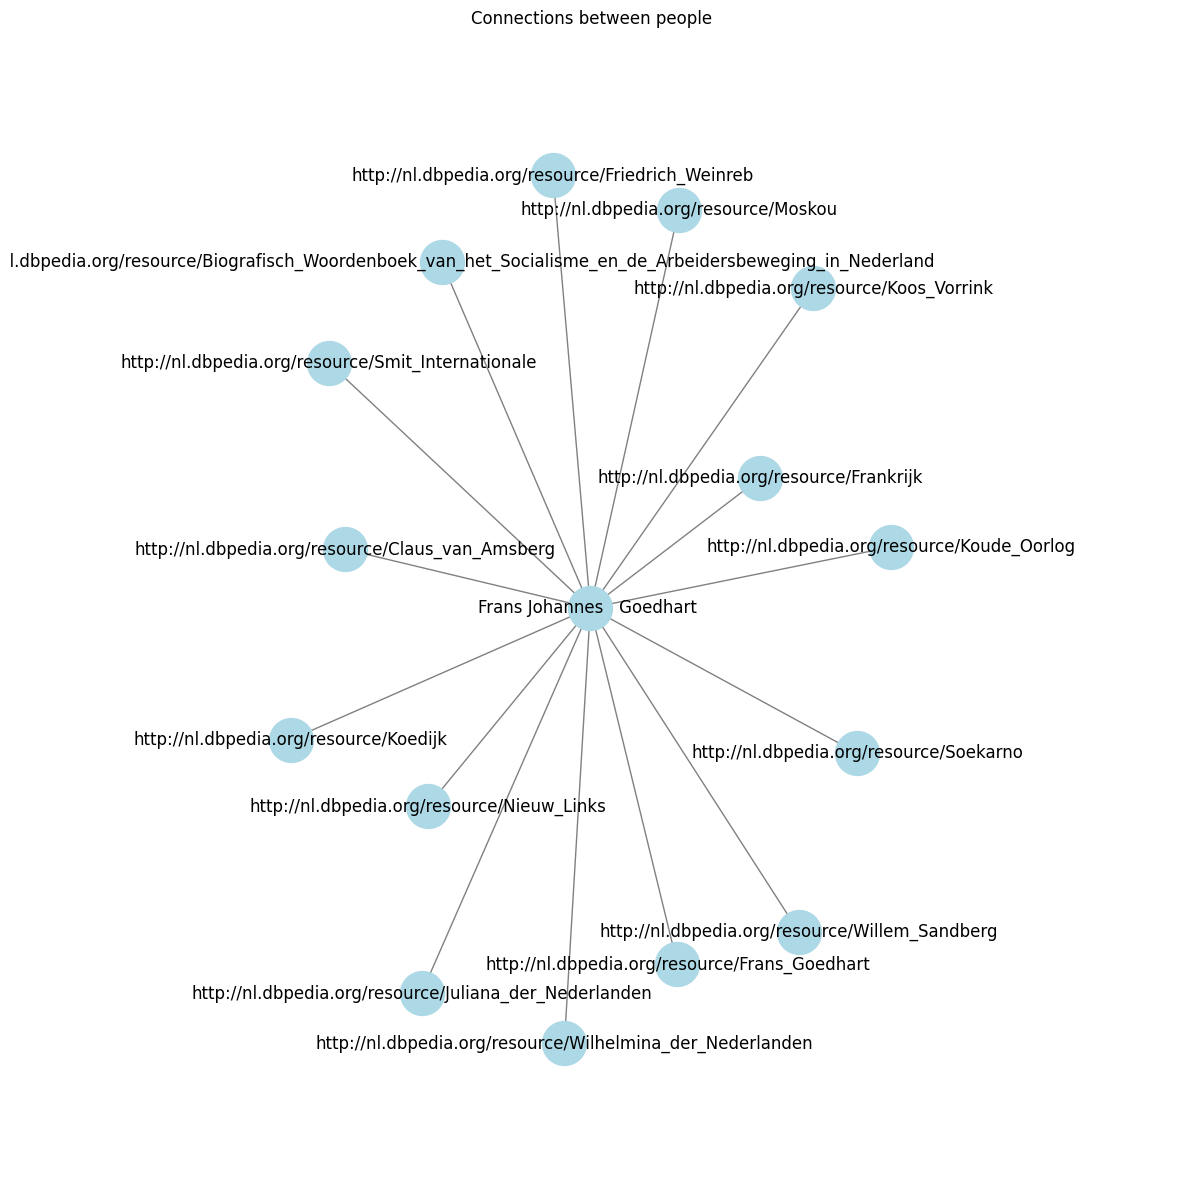

In [32]:
def show_network_of_persons():
    associations_persons = g.query("""
        PREFIX ex: <http://example.com/kad2020/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX foaf: <http://xmlns.com/foaf/0.1/>
        
        SELECT ?person1 ?person2
            WHERE{
                ?person1 a foaf:Person.
                ?person1 rdfs:label '%s'.
                ?person2 a foaf:Person. 
                ?person1 ex:associatedPerson ?person2. 
            }
    """%(chosen_person))
    
    import networkx as nx
    import matplotlib.pyplot as plt
    graph = nx.Graph()

    for association in associations_persons:
        graph.add_node(chosen_person)
        graph.add_node(association['person2'])
        graph.add_edge(chosen_person,association['person2'])
    
 
    fig, ax = plt.subplots(figsize=(15, 15))
    pos = nx.spring_layout(graph)  
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', ax=ax, node_size=1000)
    ax.set_xlim([1.6*x for x in ax.get_xlim()])
    ax.set_ylim([1.1*y for y in ax.get_ylim()])
    ax.set_title("Connections between people")
    plt.savefig('foo.png')
    
    plt.show()
    
show_network_of_persons()


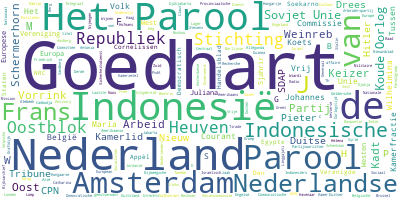

In [33]:
texts = [] 
for bio_nr in bio_nrs:
    texts.append(standoff_text[int(bio_nr)])


list_text = []
for text in texts:
    for sentence in text:
        for token in sentence:
            if token[1] != "O":
                list_text.append(token[0])

from wordcloud import WordCloud


long_string = ' '.join(list_text)


wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')


wordcloud.generate(long_string)


wordcloud.to_image()